In [ ]:
#Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Sistema sin rozamiento

El método de euler tiene error numérico, es por eso que la animación se hace analíticamente

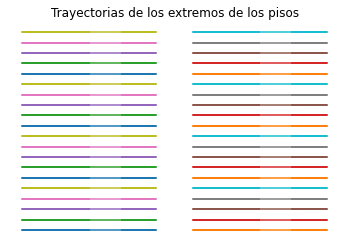

In [ ]:
t1 = 0
tf = 5*np.pi

N = 400
h = (tf - t1)/(N-1)

t = np.linspace(t1,tf,N)

m = 10
k = 1681
c = -k/m
omega0 = np.sqrt(-c)
n = 20

A = 1

K = [[2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1]]

eigvals, eigvecs = np.linalg.eigh(K, UPLO='L')

def f(t):
   return(0)

x = [np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)]
vx = [np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)]

for i in range(n):
  x[i][0] = A*eigvecs[3][i]

for i in range(n):
  vx[i][0] = 0

for i in range(N-1):
  vx[0][i+1] = vx[0][i] + h*(c*(2*x[0][i]-x[1][i]-f(h*i)))
  for q in range(n-2):
    vx[q+1][i+1] = vx[q+1][i] + h*(c*(2*x[q+1][i]-x[q][i]-x[q+2][i]))
  vx[n-1][i+1] = vx[n-1][i] + h*(c*(2*x[n-1][i]-x[n-1][i]))
  #error numérico corregido 
  for q in range(n):
    x[q][i+1] = x[q][i] + h*vx[q][i+1]

y = np.zeros(N)

for i in range(n):
  plt.plot(x[0],y+i)
  plt.plot(x[0]+2,y+i)
  plt.title('Trayectorias de los extremos de los pisos')
  plt.axis('off')

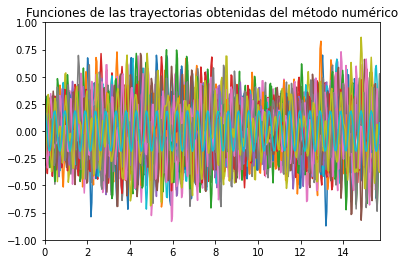

In [ ]:
t = np.linspace(t1,tf,N)
for i in range(n):
  plt.plot(t,x[i])
  plt.xlim(t1,tf)
  plt.ylim(-1,1)
  plt.title("Funciones de las trayectorias obtenidas del método numérico")

Esta parte sin rozamiento es muy caótica

## Animación sin rozamiento

Para el tercer modo de ocilamiento

0.1449950977958106


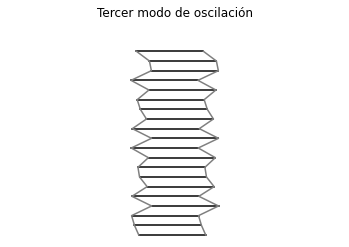

In [ ]:
realsol = [np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)]
for i in range(n):
  realsol[i] = A*np.cos(omega0*np.sqrt(eigvals[2])*t)*eigvecs[2][i]
print(eigvals[2])

fig = plt.figure()
ax = fig.gca()

def update(i):
  ax.clear()
  xdata, ydata = [], []
  for q in range(n):
    xdata.append(realsol[q][int(i)])
    ydata.append(y[int(i)]+q)
    xdata.append(realsol[q][int(i)]+2)
    ydata.append(y[int(i)]+q)
    plt.plot(xdata,ydata, color = "black")
    xdata, ydata = [], []
  for q in range(n):
    xdata.append(realsol[q][int(i)])
    ydata.append(y[int(i)]+q)
  plt.plot(xdata,ydata, color = "gray")
  xdata = []
  for q in range(n):
    xdata.append(realsol[q][int(i)]+2)
  plt.plot(xdata,ydata, color = "gray")
  xdata, ydata = [], []
  plt.xlim(-4,6)
  plt.ylim(-0.5,22)
  plt.xlabel('Suelo')
  plt.ylabel('Pisos del edificio')
  plt.title('Tercer modo de oscilación')
  plt.axis('off')

ani = animation.FuncAnimation(fig, update, frames = np.linspace(0,N-1,N), interval = 100)
ani.save("edificio.mp4")

# Sistema con rozamiento

6.4031242374328485
[ 0.49051432  1.46866444  2.43819585  3.39341896  4.32872813  5.23863461
  6.1177987   6.96106111  7.76347324  8.52032623  9.22717856  9.87988213
 10.47460663 11.00786197 11.4765188  11.87782685 12.20943109 12.46938554
 12.65616467 12.7686724 ]


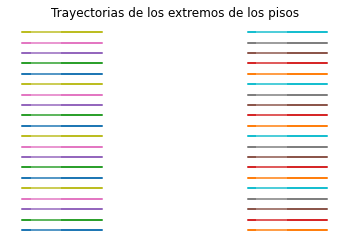

In [ ]:
t1 = 0
tf = 8*np.pi

N = 800
h = (tf - t1)/(N-1)

t = np.linspace(t1,tf,N)

m = 1
k = 41
gamma = 10
c = -k/m
v = -gamma/m

A = 1
omega0 = np.sqrt(-c)
delta = gamma/m
n = 20

K = [[2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1]]

eigvals, eigvecs = np.linalg.eigh(K, UPLO='L')
print(omega0)
print(omega0*np.sqrt(eigvals))
def f(t):
  return 0.4*np.cos(3.1179716561943813*t)#(omega0*eigvals[3])*t)

def df(t):
  return -0.4*3.1179716561943813*np.sin(3.1179716561943813*t)

x = [np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)]
vx = [np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)]

for i in range(n):
  x[i][0] = 0

for i in range(n):
  vx[i][0] = 0

for i in range(N-1):
  vx[0][i+1] = vx[0][i] + h*(c*(2*x[0][i]-x[1][i]-f(h*i))+v*(2*vx[0][i]-vx[1][i]-df(h*i)))
  for q in range(n-2):
    vx[q+1][i+1] = vx[q+1][i] + h*(c*(2*x[q+1][i]-x[q][i]-x[q+2][i])+v*(2*vx[q+1][i]-vx[q][i]-vx[q+2][i]))
  vx[n-1][i+1] = vx[n-1][i] + h*(c*(2*x[n-1][i]-x[n-2][i])+v*(2*vx[n-1][i]-vx[n-2][i]))
  #error numérico corregido
  for q in range(n):
    x[q][i+1] = x[q][i] + h*vx[q][i+1]

y = np.zeros(N)

for i in range(n):
  plt.plot(x[0],y+i)
  plt.plot(x[0]+2,y+i)
  plt.title('Trayectorias de los extremos de los pisos')
  plt.axis('off')

### Grafica de los movimientos de todos los pisos

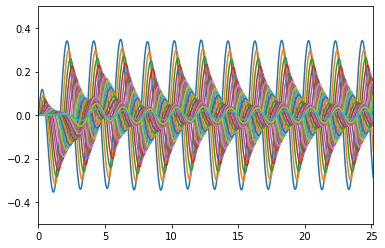

In [ ]:
t = np.linspace(t1,tf,N)
for i in range(20):
  plt.plot(t,x[i])
  plt.xlim(t1,tf)
  plt.ylim(-0.5,0.5)

Ésta parte con rozamiento no es tan caótica

## Animación con rozamiento

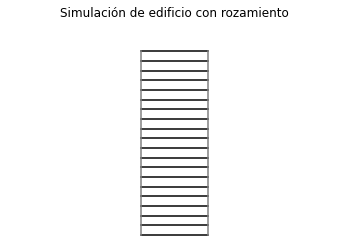

In [ ]:
fig = plt.figure()
ax = fig.gca()

def update(i):
  ax.clear()
  xdata, ydata = [], []
  for q in range(n):
    xdata.append(x[q][int(i)])
    ydata.append(y[int(i)]+q)
    xdata.append(x[q][int(i)]+2)
    ydata.append(y[int(i)]+q)
    plt.plot(xdata,ydata, color = "black")
    xdata, ydata = [], []
  for q in range(n):
    xdata.append(x[q][int(i)])
    ydata.append(y[int(i)]+q)
  plt.plot(xdata,ydata, color = "gray")
  xdata = []
  for q in range(n):
    xdata.append(x[q][int(i)]+2)
  plt.plot(xdata,ydata, color = "gray")
  xdata, ydata = [], []
  plt.xlim(-4,6)
  plt.ylim(-0.5,22)
  plt.xlabel('Suelo')
  plt.ylabel('Pisos del edificio')
  plt.title('Simulación de edificio con rozamiento')
  plt.axis('off')

ani = animation.FuncAnimation(fig, update, frames = np.linspace(0,N-1,N), interval = 100)
ani.save("edificio.mp4")

## Amplitud de la solución con $f(t)=e^{i\omega t}$ para distintos valores de $\omega$

0.45702164035611353
1.7706331492031997
3.976560847560697
3.1179716561943813


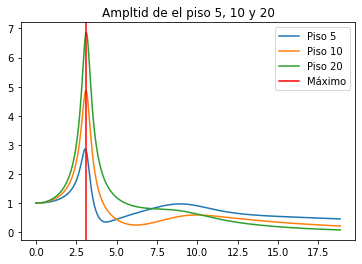

In [ ]:
Karr = [[2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2,-1],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1]]

K = np.matrix(Karr)

eigval, eigvec = np.linalg.eigh(K, UPLO='L')

z = np.transpose(np.matrix([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]))

h = np.dot(np.transpose(eigvec),z)

N = 400
n = 20
omega0 = 41
delta = 50

omega = np.linspace(0,6*np.pi,N)

C = np.matrix([[complex(0,0)]*N]*n)

sol = np.matrix([[complex(0,0)]*N]*n)

maxabs = -1
idxmax = -1

for q in range(N):
  for i in range(n):
    C[i,q] = complex(omega0**2,2*delta*omega[q])*h[i]/complex(omega0**2*eigval[i]-omega[q]**2,2*delta*eigval[i]*omega[q])
  sol[:,q] = np.dot(eigvec,C[:,q])
  if abs(sol[19,q]) > maxabs: #Encuentro el máximo para el último piso
    maxabs = abs(sol[19,q])
    idxmax = q

# print(sol.real)

plt.plot(omega, np.transpose(abs(sol[4,:])), label = "Piso 5")
print(eigval[4])
# plt.axvline(x=np.sqrt(eigval[4])*omega0)

plt.plot(omega, np.transpose(abs(sol[9,:])), label = "Piso 10")
print(eigval[9])
# plt.axvline(x=np.sqrt(eigval[9])*omega0)

plt.plot(omega, np.transpose(abs(sol[19,:])), label = "Piso 20")
print(eigval[19])


print(omega[idxmax])
plt.axvline(x=omega[idxmax], color = "red", label = "Máximo")
plt.title("Ampltid de el piso 5, 10 y 20")
plt.legend(loc="best")